In [ ]:
# !pip install keras-core --upgrade
# !pip install -q keras-nlp
# !pip install seaborn

In [ ]:
# !pip install transformers

In [1]:
# !pip install transformers[torch]

# Import the Libararies

In [ ]:
# !pip install pandas

In [ ]:
# !pip install tqdm

In [27]:
# !pip install datasets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 507 kB 5.9 MB/s            
     |████████████████████████████████| 115 kB 9.3 MB/s            
     |████████████████████████████████| 166 kB 8.9 MB/s            
     |████████████████████████████████| 38.1 MB 7.6 MB/s            
     |████████████████████████████████| 194 kB 10.5 MB/s            
     |████████████████████████████████| 132 kB 8.6 MB/s            
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.12.2
    Uninstalling fsspec-2023.12.2:
      Successfully uninstalled fsspec-2023.12.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
# import tensorflow as tf
# import keras_core as keras
# import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# print("TensorFlow version:", tf.__version__)
import re
from tqdm.auto import tqdm
tqdm.pandas()
from tqdm import tqdm
# from sentence_transformers import SentenceTransformer
# from scipy.spatial.distance import cosine
import random
# print("Keras version:", keras.__version__)
# print("KerasNLP version:", keras_nlp.__version__)

# import os
# os.environ['KERAS_BACKEND'] = 'tensorflow'
# from transformers import TFRobertaForSequenceClassification
from sklearn.model_selection import train_test_split

# Load the data


In [3]:
# train_prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv') #('train_prompts.csv')
# train_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_essays.csv')  #('train_essays.csv')
# test_essays = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')  #('test_essays.csv')
# train_extra = pd.read_csv('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_01.csv')  #('train_v3_drcat_01.csv')
# train_extra_2 = pd.read_csv('/kaggle/input/daigt-v3-train-dataset/train_v3_drcat_02.csv')  #('train_v3_drcat_02.csv')
# cleaned_text_3 = pd.read_csv('/kaggle/input/clean-data-set/cleaned_data_3_clean.csv')

In [2]:
train_prompts = pd.read_csv('train_prompts.csv') 
train_essays = pd.read_csv('train_essays.csv')  
test_essays = pd.read_csv('test_essays.csv')  
train_extra = pd.read_csv('train_v3_drcat_01.csv')  
train_extra_2 = pd.read_csv('train_v3_drcat_02.csv') 
# cleaned_text_3 = pd.read_csv('cleaned_data_3_clean.csv')

# 🐝데이터 준비 (train+extra)

Text(0.5, 1.0, 'Distribution of Generated Text')

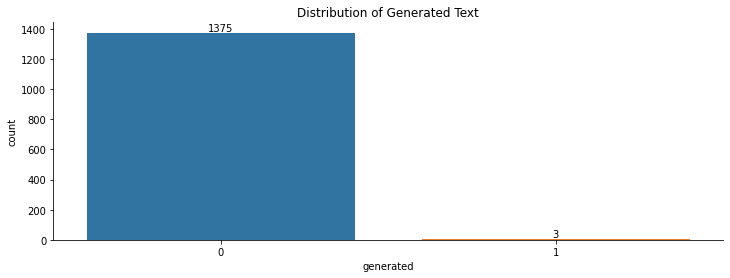

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=train_essays,
                   x="generated")

abs_values = train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [4]:
train_essays['text_length'] = train_essays['text'].apply(lambda x: len(str(x)))

# 'text' 열을 문자열로 캐스팅하고 리스트로 변환
train_essays_sen = train_essays['text'].astype(str).tolist()

# 각 텍스트의 문장 수를 세어 새로운 열에 저장
train_essays['sentence_count'] = [text.count('.') + text.count('!') + text.count('?') for text in train_essays_sen]
# df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1,inplace=True)

train_essays.drop(['id','prompt_id'],axis=1,inplace=True)

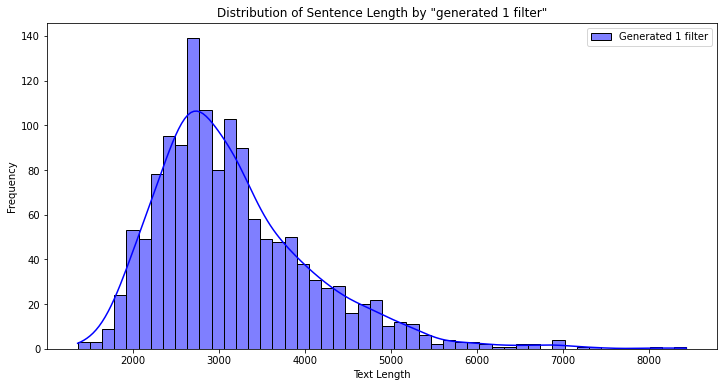

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(train_essays['text_length'], bins=50, color='blue', label='Generated 1 filter', kde=True)
plt.title('Distribution of Sentence Length by "generated 1 filter"')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
selected_rows11 = train_essays[train_essays['generated'] == 1]
selected_rows01 = train_essays[train_essays['generated'] == 0]
# 선택된 행들에 대해 describe를 수행합니다.
description11 = selected_rows11.describe()
description01 = selected_rows01.describe()

# 결과를 출력합니다.
print(description01)
print(description11)

       generated  text_length  sentence_count
count     1375.0  1375.000000     1375.000000
mean         0.0  3172.581091       30.477818
std          0.0   918.439217       10.242158
min          0.0  1486.000000        7.000000
25%          0.0  2556.500000       24.000000
50%          0.0  2987.000000       29.000000
75%          0.0  3624.500000       35.500000
max          0.0  8436.000000      108.000000
       generated  text_length  sentence_count
count        3.0     3.000000        3.000000
mean         1.0  1551.000000       12.333333
std          0.0   224.879968        2.309401
min          1.0  1356.000000       11.000000
25%          1.0  1428.000000       11.000000
50%          1.0  1500.000000       11.000000
75%          1.0  1648.500000       13.000000
max          1.0  1797.000000       15.000000


In [7]:
# 'generated' 열 값이 0인 경우와 1인 경우를 분리
generated_0_counts1 = train_essays[train_essays['generated'] == 0]['sentence_count'].value_counts().reset_index()
generated_0_counts1.columns = ['sentence_count', 'generated_0_count']

generated_1_counts1 = train_essays[train_essays['generated'] == 1]['sentence_count'].value_counts().reset_index()
generated_1_counts1.columns = ['sentence_count', 'generated_1_count']

# 결과를 오름차순으로 정렬
generated_0_counts1 = generated_0_counts1.sort_values(by='sentence_count')
generated_1_counts1 = generated_1_counts1.sort_values(by='sentence_count')

# 출력
print("Generated 0:")
print(generated_0_counts1)

print("\nGenerated 1:")
print(generated_1_counts1)


Generated 0:
    sentence_count  generated_0_count
57               7                  1
40              11                  5
59              12                  1
44              13                  4
38              14                  6
..             ...                ...
50              71                  2
58              73                  1
61              74                  1
60              82                  1
53             108                  1

[62 rows x 2 columns]

Generated 1:
   sentence_count  generated_1_count
0              11                  2
1              15                  1


In [8]:
for index, row in train_essays[(train_essays['generated'] == 1) & (train_essays['sentence_count'] == 15)].iterrows():
    print(row['text'])
    print("-" * 40)  # 경계선 출력

Limiting car use causes pollution, increases costs to users regardless of where services or services are offered. Furthermore, over use of the gas results in increased environmental degradation, harming our resources while damaging our environment.

When consumers pay a larger amount before gasoline is refined then there are higher costs of running the engine than otherwise. There are fewer places where the gas can be purchased locally causing more problems. Car trips will usually have higher tolls which results in lost wages for the transportation worker, who goes to an unnecessary location for work and then returns home and gets to pay back his transportation back costs. The car accident rate amongst children also has increased. Car pollution can become airborne easily, contaminating children's health. Also children tend to be more careless and more often in accidents simply because of being pushed out of their cars onto the road. All of this can be done to better an already polluted

In [9]:
train_essays.head()

,text,generated,text_length,sentence_count
0,Cars. Cars have been around since they became ...,0,3289,26
1,Transportation is a large necessity in most co...,0,2738,27
2,"""America's love affair with it's vehicles seem...",0,4428,48
3,How often do you ride in a car? Do you drive a...,0,4013,54
4,Cars are a wonderful thing. They are perhaps o...,0,4698,53


In [10]:
train_essays.describe()

,generated,text_length,sentence_count
count,1378.000000,1378.000000,1378.000000
mean,0.002177,3169.050798,30.438316
std,0.046625,920.588198,10.266290
min,0.000000,1356.000000,7.000000
25%,0.000000,2554.250000,24.000000
50%,0.000000,2985.500000,29.000000
75%,0.000000,3623.750000,35.000000
max,1.000000,8436.000000,108.000000


In [11]:
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            1378 non-null   object
 1   generated       1378 non-null   int64 
 2   text_length     1378 non-null   int64 
 3   sentence_count  1378 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 43.2+ KB


# ====== train_extra로부터 데이터 증강 ==========

In [ ]:
# df_train_extra=pd.concat([train_extra,train_extra_2],ignore_index=True)

# df_train_extra.rename(columns = {"label":"generated"}, inplace=True)

In [ ]:
# unique_prompt_names = df_train_extra['prompt_name'].unique()
# print(unique_prompt_names)

In [ ]:
# # generated 열 값이 0인 행들만 추출하여 새로운 데이터프레임 생성
# df_train_extra_stu1 = df_train_extra[df_train_extra['generated'] == 1]
# df_train_extra_stu0 = df_train_extra[df_train_extra['generated'] == 0]
# # df_train_extra_stu = df_train_extra_stu.drop(columns=["prompt_name", "RDizzl3_seven", 'model'])

# # df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['source'] == 'train_essays']

# # 새로운 데이터프레임 확인
# print(df_train_extra_stu1)
# print(df_train_extra_stu0)

In [ ]:
# df_train_extra_stu = pd.concat([df_train_extra_stu0,df_train_extra_stu1])

In [ ]:
# # 공백 제거
# df_train_extra_stu.dropna(subset=['text'], inplace=True)
# df_train_extra_stu['text'] = df_train_extra_stu['text'].str.strip()
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'] != ""]

# # 중복된 텍스트 제거
# df_train_extra_stu.drop_duplicates(subset='text', keep='first', inplace=True)

In [ ]:
# import re

# # 공백 제거
# df_train_extra_stu.dropna(subset=['text'], inplace=True)
# df_train_extra_stu['text'] = df_train_extra_stu['text'].str.strip()
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'] != ""]

# def clean_text(text):
#     # 줄넘김 기호를 공백으로 대체
#     text = re.sub(r'[\r\n]', ' ', text)
#     # 연속된 마침표 제거 (단, 단일 마침표는 유지)
#     text = re.sub(r'\.{2,}', '', text)
#         # 연속된 물음표와 느낌표를 하나로 축소
#     text = re.sub(r'\?{2,}', '?', text)
#     text = re.sub(r'!{2,}', '!', text)
#     # 특수 문자 제거 (단, 영문자, 숫자, 밑줄, 공백, 단일 마침표, 물음표, 느낌표는 유지)
#     text = re.sub(r'[^\w\s.?!]', '', text)
    
# #     # 연속되는 동일한 단어 또는 구문 제거 (예: 'I I I I...' 또는 'Claim The Face...')
# #     text = re.sub(r'(\b\w+\b)( \1\b)+', r'\1', text)
#     return text

# def is_text_too_short(text, min_length=150):
#     # 텍스트 길이가 최소 길이보다 짧은지 확인
#     return len(text) > min_length

# # DataFrame의 'text' 컬럼에 clean_text 함수 적용
# df_train_extra_stu['text'] = df_train_extra_stu['text'].progress_apply(clean_text)

# # 너무 짧은 텍스트 필터링
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'].progress_apply(is_text_too_short)]


# # 중복된 텍스트 제거
# df_train_extra_stu.drop_duplicates(subset='text', keep='first', inplace=True)


# def has_repeated_sentences(text):
#     # 단어 또는 구문의 반복을 체크하는 함수
#     # '\b'는 단어 경계를 나타냄, '(.+)'는 임의의 문자열, '\s'는 공백, '\1'은 첫번째 캡쳐된 그룹
#     if re.search(r'(\b.+)\b\s+\1', text):
#         return True
#     return False

# # 'text' 컬럼에서 반복되는 문장을 포함하는 행을 필터링하고 제거
# df_train_extra_stu = df_train_extra_stu[df_train_extra_stu['text'].progress_apply(has_repeated_sentences)]



In [ ]:
# df_train_extra_stu['text_length'] = df_train_extra_stu['text'].apply(lambda x: len(str(x)))
# df_train_extra_stu=df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1)

In [ ]:
# # 'text' 열을 문자열로 캐스팅하고 리스트로 변환
# df_train_extra_stu_sen = df_train_extra_stu['text'].astype(str).tolist()

# # 각 텍스트의 문장 수를 세어 새로운 열에 저장
# df_train_extra_stu['sentence_count'] = [text.count('.') + text.count('!') + text.count('?') for text in df_train_extra_stu_sen]
# # df_train_extra_stu.drop(['prompt_name','source','RDizzl3_seven','model'],axis=1,inplace=True)

In [ ]:
# df_train_extra_stu.tail()

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_extra_stu,
                   x="generated",
                   order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_extra_stu,
                   x="generated",
                   order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


In [ ]:
selected_rows1 = df_train_extra_stu[df_train_extra_stu['generated'] == 1]
selected_rows0 = df_train_extra_stu[df_train_extra_stu['generated'] == 0]
# 선택된 행들에 대해 describe를 수행합니다.
description1 = selected_rows1.describe()
description0 = selected_rows0.describe()

# 결과를 출력합니다.
print(description0)
print(description1)

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_extra_stu,
                   x="generated",
                   order=df_train_extra_stu['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_extra_stu['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


In [ ]:
plt.figure(figsize=(16, 6))

# 'generated'가 0인 경우의 히스토그램
sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 0]['text_length'], bins=150, color='blue', label='Generated 0', kde=True)

# 'generated'가 1인 경우의 히스토그램
sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 1]['text_length'], bins=150, color='red', label='Generated 1', kde=True)

plt.title('Distribution of word count by "generated"')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(16, 6))

# 'generated'가 0인 경우의 히스토그램
sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 0]['sentence_count'], bins=150, color='blue', label='Generated 0', kde=True)

# 'generated'가 1인 경우의 히스토그램
sns.histplot(df_train_extra_stu[df_train_extra_stu['generated'] == 1]['sentence_count'], bins=150, color='red', label='Generated 1', kde=True)

plt.title('Distribution of Sentence count by "generated"')
plt.xlabel('sentence_count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 예시 (df_train_extra_stu)
# df_train_extra_stu = pd.DataFrame({
#     'text_length': [100, 200, 300, 400],
#     'sentence_count': [10, 20, 30, 40]
# })

# 산점도 생성
plt.scatter(df_train_extra_stu['text_length'], df_train_extra_stu['sentence_count'])
plt.xlabel('Text Length')
plt.ylabel('Sentence Count')
plt.title('Scatter Plot of Text Length vs Sentence Count')
plt.show()


In [ ]:
# 상관계수 계산
correlation = df_train_extra_stu['text_length'].corr(df_train_extra_stu['sentence_count'])
print("Correlation coefficient:", correlation)


In [ ]:
selected_rows1 = df_train_extra_stu[df_train_extra_stu['generated'] == 1]
selected_rows0 = df_train_extra_stu[df_train_extra_stu['generated'] == 0]
# 선택된 행들에 대해 describe를 수행합니다.
description1 = selected_rows1.describe()
description0 = selected_rows0.describe()

# 결과를 출력합니다.
print(description0)
print(description1)

In [ ]:
# 'generated' 열 값이 0인 경우와 1인 경우를 분리
generated_0_counts = df_train_extra_stu[df_train_extra_stu['generated'] == 0]['sentence_count'].value_counts().reset_index()
generated_0_counts.columns = ['sentence_count', 'generated_0_count']

generated_1_counts = df_train_extra_stu[df_train_extra_stu['generated'] == 1]['sentence_count'].value_counts().reset_index()
generated_1_counts.columns = ['sentence_count', 'generated_1_count']

# 결과를 오름차순으로 정렬
generated_0_counts = generated_0_counts.sort_values(by='sentence_count')
generated_1_counts = generated_1_counts.sort_values(by='sentence_count')

# 출력
print("Generated 0:")
print(generated_0_counts)

print("\nGenerated 1:")
print(generated_1_counts)


In [ ]:
for index, row in df_train_extra_stu[(df_train_extra_stu['generated'] == 1) & (df_train_extra_stu['sentence_count'] == 3)].iterrows():
    print(row['text'])
    print("-" * 40)  # 경계선 출력

In [ ]:
# # 정제된 데이터를 CSV 파일로 저장
# df_train_extra_stu.to_csv('cleaned_data_3.csv', index=False)

In [ ]:
# df_train_extra_stu = pd.read_csv('/kaggle/input/clean-data-set/cleaned_data_3_clean.csv')

# =====df_train_essays_final 데이터셋 준비=======

In [14]:
# df_train_extra_stu = pd.read_csv('/kaggle/input/clean-data-set/cleaned_data_3_clean.csv')

In [12]:
df_train_extra_stu = pd.read_csv('cleaned_data_3_clean.csv')

In [13]:
df_train_essays_final = pd.concat([train_essays,df_train_extra_stu],axis=0)

Text(0.5, 1.0, 'Distribution of Generated Text')

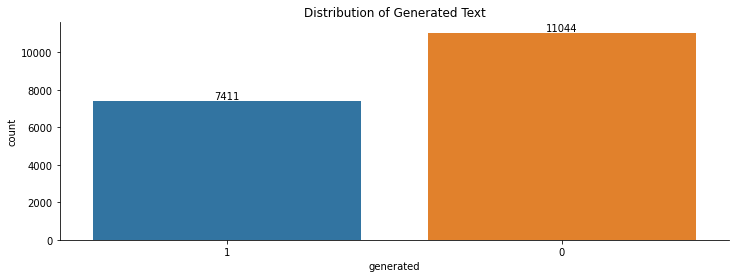

In [16]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_final,
                   x="generated",
                   order=df_train_essays_final['generated'].value_counts().index[::-1])  # 데이터를 뒤집어서 정렬

abs_values = df_train_essays_final['generated'].value_counts().values[::-1]  # 데이터를 뒤집어서 정렬

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")


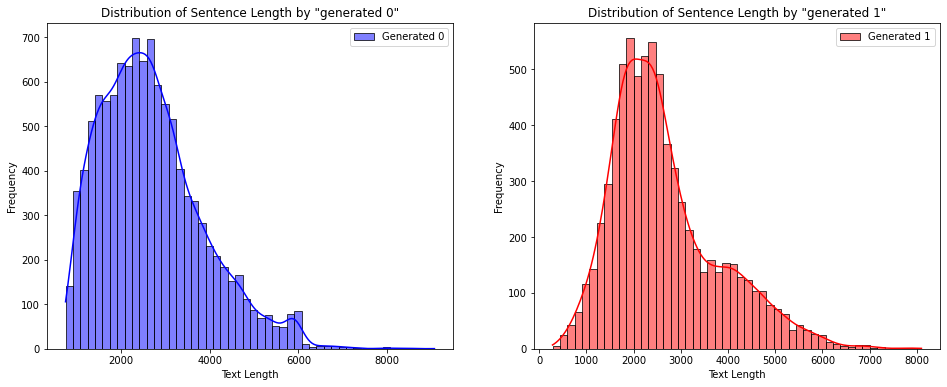

In [17]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the histogram for 'text_length' with generated=0
sns.histplot(df_train_essays_final[df_train_essays_final['generated'] == 0]['text_length'], bins=50, color='blue', label='Generated 0', kde=True, ax=ax1)
ax1.set_title('Distribution of Sentence Length by "generated 0"')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency')
ax1.legend()

# Plot the histogram for 'text_length' with generated=1
sns.histplot(df_train_essays_final[df_train_essays_final['generated'] == 1]['text_length'], bins=50, color='red', label='Generated 1', kde=True, ax=ax2)
ax2.set_title('Distribution of Sentence Length by "generated 1"')
ax2.set_xlabel('Text Length')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.show()


In [21]:
df_train_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18455 entries, 0 to 17076
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       18455 non-null  object
 1   generated  18455 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 948.6+ KB


# 🐝 **토큰화 진행 (WordPiece vs BPE)** 

## BPE

In [14]:
df_train_essays_final = df_train_essays_final.drop(['text_length', 'sentence_count'],axis=1)

In [15]:
df_train_essays_final.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
# max_length 파라미터 조정을 통한 성능 확인

In [16]:
problematic_data = df_train_essays_final[df_train_essays_final['text'].apply(lambda x: not isinstance(x, str))]
print(problematic_data)

Empty DataFrame
Columns: [text, generated]
Index: []


In [17]:
from tokenizers import(
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

from transformers import PreTrainedTokenizerFast

from datasets import Dataset
from tqdm.auto import tqdm
from tokenizers import processors

In [18]:
LOWERCASE = False
VOCAB_SIZE = 30522

In [19]:
# Tokenizer 초기화
raw_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Normalizer 설정
raw_tokenizer.normalizer = normalizers.Sequence([normalizers.NFC()] + [normalizers.Lowercase()] if LOWERCASE else [])

# Pre-tokenizer 설정: Byte-Level pre-tokenizer를 사용
# "Ġ" 문자 제거 하고 싶다면 -> add_prefix_space=False 추가
raw_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# BPE Trainer 설정 및 스페셜 토큰 추가
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.BpeTrainer(vocab_size=VOCAB_SIZE, special_tokens=special_tokens)

# 데이터셋 로드 및 토크나이저 훈련 (훈련 셋 : df_train_essays_final[['text']])
dataset = Dataset.from_pandas(df_train_essays_final[['text']])
def train_corp_iter(): 
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["text"]
raw_tokenizer.train_from_iterator(train_corp_iter(), trainer=trainer)

# PreTrainedTokenizerFast로 래핑
from transformers import RobertaTokenizerFast

tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=raw_tokenizer,
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",
)

In [20]:
# # "[UNK]" 토큰의 정수 ID 확인
# unk_token_id = tokenizer.convert_tokens_to_ids("[UNK]")

# # "[PAD]" 토큰의 정수 ID 확인
# pad_token_id = tokenizer.convert_tokens_to_ids("[PAD]")

# # "[CLS]" 토큰의 정수 ID 확인
# cls_token_id = tokenizer.convert_tokens_to_ids("[CLS]")

# # "[SEP]" 토큰의 정수 ID 확인
# sep_token_id = tokenizer.convert_tokens_to_ids("[SEP]")

# # "[MASK]" 토큰의 정수 ID 확인
# mask_token_id = tokenizer.convert_tokens_to_ids("[MASK]")

# print("[UNK] 토큰의 정수 ID:", unk_token_id)
# print("[PAD] 토큰의 정수 ID:", pad_token_id)
# print("[CLS] 토큰의 정수 ID:", cls_token_id)
# print("[SEP] 토큰의 정수 ID:", sep_token_id)
# print("[MASK] 토큰의 정수 ID:", mask_token_id)

In [21]:
# text = ["Let's test this tokenizer.", "Nice to meet you"]
# tokens = tokenizer.encode(text)
# print(tokens)
# print(tokenizer.decode(tokens))

In [22]:
# tokens = tokenizer.tokenize(text)
# print(tokens)

In [23]:
# encoding = tokenizer.encode_plus(text, return_tensors="tf")
# print(encoding)

In [24]:
# df_train_essays_final['text'] 토큰화 해보기
# test_essays 데이터의 토큰화 진행 상황을 표시
test_input_ids = []
test_attention_masks = []

for text in tqdm(df_train_essays_final['text'].tolist(), desc="토큰화 진행중"):
    encoded = tokenizer.encode_plus(text, 
                                    add_special_tokens=True, 
                                    max_length=256, 
                                    padding='max_length', 
                                    truncation=True, 
                                    return_attention_mask=True, 
                                    return_tensors='np')

    test_input_ids.append(encoded['input_ids'][0])
    test_attention_masks.append(encoded['attention_mask'][0])
    # 토큰화된 데이터를 pandas DataFrame으로 변환
df_encoded = pd.DataFrame({
    'input_ids': test_input_ids,
    'attention_mask': test_attention_masks
})

토큰화 진행중:   0%|          | 0/18455 [00:00<?, ?it/s]

In [ ]:
# from transformers import RobertaTokenizer
# from tqdm.auto import tqdm
# import pandas as pd

# # BERT 토크나이저 초기화
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# # 토큰 길이 계산
# token_lengths = []
# for text in df_train_essays_final['text']:  # 'text_column'은 텍스트가 포함된 컬럼 이름입니다.
#     tokens = tokenizer.encode(text, add_special_tokens=True)
#     token_lengths.append(len(tokens))

    
# df_ = df_train_essays_final.copy()
# # 토큰 길이를 DataFrame에 추가
# df_['text'] = token_lengths

# # 길이 분포 분석
# print(df_['text'].describe())

# # # # 토큰 길이를 DataFrame에 추가
# # df_train_essays_final['text'] = token_lengths

# # # # 길이 분포 분석
# # print(df_train_essays_final['text'].describe())

In [ ]:

# # tqdm을 사용하여 토큰화 진행 상황을 표시
# input_ids = []
# attention_masks = []

# for text in tqdm(df_train_essays_final['text'].tolist(), desc="토큰화 진행중"):
#     encoded = tokenizer.encode_plus(text, 
#                                     add_special_tokens=True, 
#                                     max_length=256, 
#                                     padding='max_length', 
#                                     truncation=True, 
#                                     return_attention_mask=True, 
#                                     return_tensors='np')
#     input_ids.append(encoded['input_ids'][0])
#     attention_masks.append(encoded['attention_mask'][0])

# # 토큰화된 데이터를 pandas DataFrame으로 변환
# df_encoded = pd.DataFrame({
#     'input_ids': input_ids,
#     'attention_mask': attention_masks
# })



# 🐝 **모델학습 진행**

# 🐝 RoBERTa 코드 적용

In [25]:
# 첫 번째 행의 'input_ids'와 'attention_mask' 열의 데이터 출력
first_row_input_ids = df_encoded['input_ids'].iloc[0]
first_row_attention_mask = df_encoded['attention_mask'].iloc[0]

first_row_input_ids, first_row_attention_mask

(array([ 1330,    11,  1330,   205,   534,   774,  1270,   211,  3146,
         4433,   145,   114, 11806,    69,    10,   441, 15789,  5054,
         1223,   142,  3330,   114,  1009, 22395,    11,  1330,   205,
         4042,   111,  1006,  2016,   145,   355,   511,   651,  1293,
         1270,   633,    11,   900,   989,    10,   250,   199,  3372,
          132,  1964,   345,  1037,   215,   627,   244,   149,   111,
          541,   496,    11,  1404,   434,    10,  1037,   114,   504,
          143,   350,   637,   149,   111,   541,   496,   132,   255,
           11,   101,   101,  2663,   342,  1444,   143,   279,    10,
          777,    10,   973,  2663,  3646,  4025,    10,  3232,  4285,
          655,  1995,  1330,  3892,   296, 11534,  2512,   478,    10,
          468,  3732,   199,   114, 14182,   143,  4051,    10,   689,
         3358,   396,  2432,   323,  2117, 13070,   228,  9440,  2495,
          132,   412,   238,  3640,    11, 10162,   714,   468,   279,
      

In [26]:
# 데이터프레임에서 필요한 열만 선택
df_encoded = df_encoded[['input_ids', 'attention_mask']]

# 'generated' 열은 레이블로 사용할 것이므로 따로 선택
labels = df_train_essays_final['generated'].values


In [27]:
print("df_encoded shape:", df_encoded.shape)

print("labels:", len(labels))

df_encoded shape: (18455, 2)
labels: 18455


In [28]:
# 학습 및 검증 데이터셋 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(df_encoded, labels, random_state=2018, test_size=0.2)


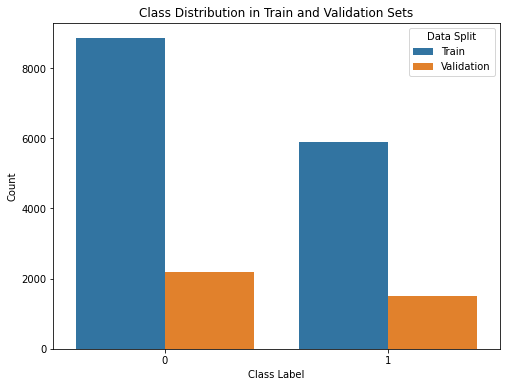

Number of data points with 'generated' label equal to 1 in Train set: 8855
Number of data points with 'generated' label equal to 1 in Validation set: 2189
Number of data points with 'generated' label equal to 1 in Train set: 5909
Number of data points with 'generated' label equal to 1 in Validation set: 1502


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 클래스 분포 확인을 위한 데이터프레임 생성
train_df = pd.DataFrame({"Data Split": ["Train"] * len(train_labels), "Labels": train_labels})
validation_df = pd.DataFrame({"Data Split": ["Validation"] * len(validation_labels), "Labels": validation_labels})
combined_df = pd.concat([train_df, validation_df])

# 카운트 플롯 그리기
plt.figure(figsize=(8, 6))
sns.countplot(data=combined_df, x="Labels", hue="Data Split")
plt.title("Class Distribution in Train and Validation Sets")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.legend(title="Data Split")
plt.show()


# Train set에서 0의 개수 세기
train_generated_1_count = train_df[train_df["Labels"] == 0].shape[0]
print("Number of data points with 'generated' label equal to 1 in Train set:", train_generated_1_count)

# Validation set에서 0의 개수 세기
validation_generated_1_count = validation_df[validation_df["Labels"] == 0].shape[0]
print("Number of data points with 'generated' label equal to 1 in Validation set:", validation_generated_1_count)

# Train set에서 1의 개수 세기
train_generated_1_count = train_df[train_df["Labels"] == 1].shape[0]
print("Number of data points with 'generated' label equal to 1 in Train set:", train_generated_1_count)

# Validation set에서 1의 개수 세기
validation_generated_1_count = validation_df[validation_df["Labels"] == 1].shape[0]
print("Number of data points with 'generated' label equal to 1 in Validation set:", validation_generated_1_count)


In [30]:
# 데이터셋 준비
train_inputs = {
    "input_ids": np.array(train_inputs["input_ids"].to_list()),
    "attention_mask": np.array(train_inputs["attention_mask"].to_list()),
    "labels": np.array(train_labels)
}
train_labels = np.array(train_labels)

validation_inputs = {
    "input_ids": np.array(validation_inputs["input_ids"].to_list()),
    "attention_mask": np.array(validation_inputs["attention_mask"].to_list()),
    "labels": np.array(validation_labels)
}
validation_labels = np.array(validation_labels)


In [31]:
# 입력 데이터 형상 확인
print("train_inputs[input_ids] shape:", train_inputs['input_ids'].shape)
print("train_inputs[attention_mask] shape:", train_inputs['attention_mask'].shape)
print("train_inputs[labels] shape:", train_inputs['attention_mask'].shape)
print("validation_inputs[input_ids] shape:", validation_inputs['input_ids'].shape)
print("validation_inputs[attention_mask] shape:", validation_inputs['attention_mask'].shape)
print("validation_inputs[labels] shape:", validation_inputs['attention_mask'].shape)
# 필요한 경우 패딩 또는 트리밍 수행
# 예시: train_inputs['input_ids'] = pad_or_trim(train_inputs['input_ids'], desired_length)

# 모델 학습을 다시 시도


train_inputs[input_ids] shape: (14764, 256)
train_inputs[attention_mask] shape: (14764, 256)
train_inputs[labels] shape: (14764, 256)
validation_inputs[input_ids] shape: (3691, 256)
validation_inputs[attention_mask] shape: (3691, 256)
validation_inputs[labels] shape: (3691, 256)


In [32]:
print("train_inputs[input_ids] type:", train_inputs['input_ids'].dtype)
print("train_inputs[attention_mask] type:", train_inputs['attention_mask'].dtype)
print("train_inputs[labels] type:", train_inputs['attention_mask'].dtype)
print("validation_inputs[input_ids] type:", validation_inputs['input_ids'].dtype)
print("validation_inputs[attention_mask] type:", validation_inputs['attention_mask'].dtype)
print("validation_inputs[labels] type:", validation_inputs['attention_mask'].dtype)


train_inputs[input_ids] type: int64
train_inputs[attention_mask] type: int64
train_inputs[labels] type: int64
validation_inputs[input_ids] type: int64
validation_inputs[attention_mask] type: int64
validation_inputs[labels] type: int64


In [38]:
from datasets import Dataset

In [40]:
train_dataset = Dataset.from_dict(train_inputs)
validation_dataset = Dataset.from_dict(validation_inputs)

In [44]:
print("train_dataset type:", type(train_dataset))
print("validation_dataset type:", type(validation_dataset))

train_dataset type: <class 'datasets.arrow_dataset.Dataset'>
validation_dataset type: <class 'datasets.arrow_dataset.Dataset'>


## ============= 모델학습 ==============

In [47]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# # ROBERTa 토크나이저 초기화                 # "단순한 모델의 경우 토큰화 전처리 없이 trainer.train() 에 tokenizer 바로 부여가능
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

model_checkpoint = 'roberta-base' # "모델이름"      # "모델마다 토크나이저 주의"    
                                  
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Move your model and data to the GPU
model.to(device);

# 조기 종료 콜백 설정
from transformers import EarlyStoppingCallback
early_stopping = EarlyStoppingCallback(early_stopping_patience=6)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
# 훈련 인자 설정
from transformers import TrainingArguments

num_train_epochs = 10.0
metric_name = "roc_auc"
model_name = "roberta-base"  # "모델이름"
batch_size = 8
args = TrainingArguments(
    f"{model_name}-finetuned_v5",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    lr_scheduler_type="cosine",
    
    optim="adamw_torch",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    gradient_accumulation_steps=8,
    num_train_epochs=num_train_epochs,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    report_to='none',
    save_total_limit=2,
)


In [49]:
# 평가 메트릭 설정
from sklearn.metrics import roc_auc_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    auc = roc_auc_score(labels, probs[:,1], multi_class='ovr')
    return {"roc_auc": auc}

In [50]:
# 트레이너 설정 및 훈련 시작
from transformers import Trainer
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,  # train_inputs를 훈련 데이터셋으로 사용
    eval_dataset=validation_dataset,  # validation_inputs를 검증 데이터셋으로 사용
    tokenizer=tokenizer,  # 단순 토크나이저 즉시 부여, 토큰화가 되어있는 dataset은 스스로 pass
    callbacks=[early_stopping],
    compute_metrics=compute_metrics  # 평가 메트릭 함수
)

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Roc Auc
0,No log,0.107253,0.993846
1,No log,0.079229,0.997219
2,0.183700,0.086781,0.998146


# ======= inference =======

In [ ]:
import transformers
import datasets
import pandas as pd
import numpy as np
from datasets import Dataset
import os
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from transformers import AutoTokenizer

In [ ]:
ls -l /kaggle/input/detect-llm-models/distilroberta-finetuned_v5          # "모델이름"

In [ ]:
model_checkpoint = "/kaggle/input/detect-llm-models/roberta-base-finetuned_v5/checkpoint-49654"        #"모델이름"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
def preprocess_function(examples):
    return tokenizer(examples['text'], max_length = 512 , padding=True, truncation=True)
num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Move your model and data to the GPU
model.to(device);
trainer = Trainer(
    model,
    tokenizer=tokenizer,
)
test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
test_ds = Dataset.from_pandas(test)
test_ds_enc = test_ds.map(preprocess_function, batched=True)
test_preds = trainer.predict(test_ds_enc)
logits = test_preds.predictions
probs = (np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True))[:,0]
sub = pd.DataFrame()
sub['id'] = test['id']
sub['generated'] = probs
sub.to_csv('submission.csv', index=False)
sub.head()

## ========모델표현 과거======

In [ ]:
# model = TFRobertaForSequenceClassification.from_pretrained('/kaggle/input/roberta/roberta-base', local_files_only=True)

In [67]:
# model = TFRobertaForSequenceClassification.from_pretrained('roberta-base')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

In [68]:
# # 모델 컴파일
# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [60]:
# model.summary()

Model: "tf_roberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLayer  multiple                 124055040 
 )                                                               
                                                                 
 classifier (TFRobertaClassi  multiple                 592130    
 ficationHead)                                                   
                                                                 
Total params: 124,647,170
Trainable params: 124,647,170
Non-trainable params: 0
_________________________________________________________________


In [69]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# # 배치 크기 설정
# batch_size = 8

# # 체크포인트 파일 경로 설정
# checkpoint_path = "best_model_clean_roberta.h5"

# # ModelCheckpoint 콜백 생성 (Tensorflow SavedModel 형식으로 저장)
# checkpoint = ModelCheckpoint(
#     checkpoint_path, 
#     monitor='val_loss', 
#     verbose=1, 
#     save_best_only=True, 
#     mode='min', 
#     save_format='h5'  # H5 포맷으로 저장하도록 설정
# )

# # EarlyStopping 콜백 생성
# early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min')

# # 모델 학습을 다시 시도하면서 콜백 추가
# history = model.fit(
#     train_inputs,
#     train_labels,
#     epochs=3,  # 에포크 수 증가
#     batch_size=batch_size,
#     validation_data=(validation_inputs, validation_labels),
#     callbacks=[checkpoint, early_stopping]  # 콜백 리스트에 ModelCheckpoint와 EarlyStopping 추가
# )


Epoch 1/3
1846/1846 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.6010
Epoch 00001: val_loss improved from inf to 0.67588, saving model to best_model_clean_roberta.h5


NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# # 배치 크기 설정
# batch_size = 8

# # 체크포인트 파일 경로 설정
# checkpoint_path = "best_model_clean_roberta.h5"

# # ModelCheckpoint 콜백 생성 (Tensorflow SavedModel 형식으로 저장)
# checkpoint = ModelCheckpoint(
#     checkpoint_path, 
#     monitor='val_loss', 
#     verbose=1, 
#     save_best_only=True, 
#     mode='min', 
#     save_format='h5'  # H5 포맷으로 저장하도록 설정
# )

# # EarlyStopping 콜백 생성
# early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

# # 모델 학습을 다시 시도하면서 콜백 추가
# history = model.fit(
#     train_inputs,
#     train_labels,
#     epochs=50,  # 에포크 수 증가
#     batch_size=batch_size,
#     validation_data=(validation_inputs, validation_labels),
#     callbacks=[checkpoint, early_stopping]  # 콜백 리스트에 ModelCheckpoint와 EarlyStopping 추가
# )


In [ ]:
# import matplotlib.pyplot as plt

# # 정확도 그래프
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# # 손실 그래프
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()

# plt.show()


In [ ]:
# from sklearn.metrics import roc_curve, auc

# # 검증 데이터에 대한 예측 로짓을 얻음
# y_pred_logits = model.predict(validation_inputs).logits

# # 로짓을 확률로 변환 (이진 분류 가정)
# y_pred_probs = tf.nn.softmax(y_pred_logits, axis=1)[:, 1].numpy()

# # ROC 곡선 계산
# fpr, tpr, thresholds = roc_curve(validation_labels, y_pred_probs)

# # AUC 계산
# roc_auc = auc(fpr, tpr)

# # ROC 곡선 그리기
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


In [ ]:
# y_pred_logits의 형태와 처음 몇 개의 로짓 출력
print("Shape of y_pred_logits:", y_pred_logits.shape)
print("Sample logits:", y_pred_logits[:5])

# y_pred_probs의 형태와 처음 몇 개의 확률 출력
print("Shape of y_pred_probs:", y_pred_probs.shape)
print("Sample probabilities:", y_pred_probs[:5])

# ======test set에 대한 검증=======

In [ ]:
# # 저장된 모델의 경로
# saved_model_path = "best_model_clean_roberta.h5"  # .h5 확장자 제거

# # 저장된 모델 불러오기
# loaded_model = tf.keras.models.load_model(saved_model_path)

In [ ]:
# loaded_model.summary()

In [ ]:
# # test_essays 데이터의 토큰화 진행 상황을 표시
# test_input_ids = []
# test_attention_masks = []

# for text in tqdm(test_essays['text'].tolist(), desc="토큰화 진행중"):
#     encoded = tokenizer.encode_plus(text, 
#                                     add_special_tokens=True, 
#                                     max_length=256, 
#                                     padding='max_length', 
#                                     truncation=True, 
#                                     return_attention_mask=True, 
#                                     return_tensors='np')
#     test_input_ids.append(encoded['input_ids'][0])
#     test_attention_masks.append(encoded['attention_mask'][0])



# test_inputs = {
#     "input_ids": np.array(test_input_ids),
#     "attention_mask": np.array(test_attention_masks)
# }  

In [ ]:
# # 입력 데이터 형상 확인
# print("test_inputs[input_ids] shape:", test_inputs['input_ids'].shape)
# print("test_inputs[attention_mask] shape:", test_inputs['attention_mask'].shape)
# # print("test_inputs[token_type_ids] shape:", test_inputs['token_type_ids'].shape)
# # 데이터 타입 확인
# print("test_inputs[input_ids] type:", test_inputs['input_ids'].dtype)
# print("test_inputs[attention_mask] type:", test_inputs['attention_mask'].dtype)
# # print("test_inputs[token_type_ids] type:", test_inputs['token_type_ids'].dtype)

In [ ]:
# # 검증 데이터에 대한 예측 로짓을 얻음
# prediction_logits = loaded_model.predict(test_inputs).logits

# # 예측 결과를 적절한 형태로 변환
# prediction_probs = tf.nn.softmax(prediction_logits, axis=1)[:, 1].numpy()

# # 결과를 캐글 제출 형식에 맞게 데이터프레임으로 변환
# submission = pd.DataFrame({
#     'id': test_essays['id'],  # 샘플 ID
#     'prediction': prediction_probs  # 예측 확률
# })

# # 결과를 CSV 파일로 저장
# submission.to_csv('submission_clean_roberta.csv', index=False)
